In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pandas.api.types import is_numeric_dtype
import re

In [2]:
df = pd.read_csv("./Telco-Customer-Churn.csv")

In [3]:
df

,customerID,"gender (Male = 1, Female = 0)","SeniorCitizen (Yes = 1, No = 0)","Partner (Yes = 1, No = 0)","Dependents (Yes = 1, No = 0)",tenure,"PhoneService (Yes = 1, No = 0)","MultipleLines (0 = No phone service, 1 = No, 2 = Yes)","InternetService (0 = No, 1 = DSL, 2 = Fiber optic)","OnlineSecurity (No = 0, No internet service = 1, Yes = 2)",...,"DeviceProtection (No = 0, No internet service = 1, Yes = 2)","TechSupport (No = 0, No internet service = 1, Yes = 2)","StreamingTV (No = 0, No internet service = 1, Yes = 2)","StreamingMovies (No = 0, No internet service = 1, Yes = 2)","Contract (Month-to-month = 0, One year = 1, Two year = 2)","PaperlessBilling (Yes = 1, No = 0)","PaymentMethod (Mailed check = 3, Electronic check = 2, Credit card = 1, Bank transfer = 0)",MonthlyCharges,TotalCharges,"Churn (Yes = 1, No = 0)"
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,1,1,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,1,1,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,1,2,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,1,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,2,2,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,0,1,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,2,2,0,...,0,0,0,0,0,1,3,74.40,306.60,1


In [4]:
# Get the number of rows and columns
print(df.shape)
# get the column names
print(df.columns)

(7043, 21)
Index(['customerID', 'gender (Male = 1, Female = 0)',
       'SeniorCitizen (Yes = 1, No = 0)', 'Partner (Yes = 1, No = 0)',
       'Dependents (Yes = 1, No = 0)', 'tenure',
       'PhoneService (Yes = 1, No = 0)',
       'MultipleLines (0 = No phone service, 1 = No, 2 = Yes) ',
       'InternetService (0 = No, 1 = DSL, 2 = Fiber optic)',
       'OnlineSecurity (No = 0, No internet service = 1, Yes = 2)',
       'OnlineBackup (No = 0, No internet service = 1, Yes = 2)',
       'DeviceProtection (No = 0, No internet service = 1, Yes = 2)',
       'TechSupport  (No = 0, No internet service = 1, Yes = 2)',
       'StreamingTV (No = 0, No internet service = 1, Yes = 2)',
       'StreamingMovies (No = 0, No internet service = 1, Yes = 2)',
       'Contract (Month-to-month = 0, One year = 1, Two year = 2)',
       'PaperlessBilling (Yes = 1, No = 0)',
       'PaymentMethod (Mailed check = 3, Electronic check = 2, Credit card = 1, Bank transfer = 0)',
       'MonthlyCharges', 'Tota

In [5]:
for i in df.columns:
    if is_numeric_dtype(df[i]) == False:
        list_char = []
        for j in range(len(df)):
            if type(df[i][j]) == str:
                list_char.extend(re.findall("[^A-Za-z0-9]", df[i][j]))
        print(i, list(dict.fromkeys(list_char)))

customerID ['-']


In [6]:
df.info()
print("-" * 50)
print(pd.value_counts(df.dtypes))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   customerID                                                                                  7043 non-null   object 
 1   gender (Male = 1, Female = 0)                                                               7043 non-null   int64  
 2   SeniorCitizen (Yes = 1, No = 0)                                                             7043 non-null   int64  
 3   Partner (Yes = 1, No = 0)                                                                   7043 non-null   int64  
 4   Dependents (Yes = 1, No = 0)                                                                7043 non-null   int64  
 5   tenure                                   

C:\Users\baokh\AppData\Local\Temp\ipykernel_11440\1220394291.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(df.dtypes))


In [7]:
# show duplicate rows
df[df.duplicated()]

,customerID,"gender (Male = 1, Female = 0)","SeniorCitizen (Yes = 1, No = 0)","Partner (Yes = 1, No = 0)","Dependents (Yes = 1, No = 0)",tenure,"PhoneService (Yes = 1, No = 0)","MultipleLines (0 = No phone service, 1 = No, 2 = Yes)","InternetService (0 = No, 1 = DSL, 2 = Fiber optic)","OnlineSecurity (No = 0, No internet service = 1, Yes = 2)",...,"DeviceProtection (No = 0, No internet service = 1, Yes = 2)","TechSupport (No = 0, No internet service = 1, Yes = 2)","StreamingTV (No = 0, No internet service = 1, Yes = 2)","StreamingMovies (No = 0, No internet service = 1, Yes = 2)","Contract (Month-to-month = 0, One year = 1, Two year = 2)","PaperlessBilling (Yes = 1, No = 0)","PaymentMethod (Mailed check = 3, Electronic check = 2, Credit card = 1, Bank transfer = 0)",MonthlyCharges,TotalCharges,"Churn (Yes = 1, No = 0)"


In [8]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column} -> {num_distinct_values} distinct values\n")

customerID -> 7043 distinct values

gender (Male = 1, Female = 0) -> 2 distinct values

SeniorCitizen (Yes = 1, No = 0) -> 2 distinct values

Partner (Yes = 1, No = 0) -> 2 distinct values

Dependents (Yes = 1, No = 0) -> 2 distinct values

tenure -> 73 distinct values

PhoneService (Yes = 1, No = 0) -> 2 distinct values

MultipleLines (0 = No phone service, 1 = No, 2 = Yes)  -> 3 distinct values

InternetService (0 = No, 1 = DSL, 2 = Fiber optic) -> 3 distinct values

OnlineSecurity (No = 0, No internet service = 1, Yes = 2) -> 3 distinct values

OnlineBackup (No = 0, No internet service = 1, Yes = 2) -> 3 distinct values

DeviceProtection (No = 0, No internet service = 1, Yes = 2) -> 3 distinct values

TechSupport  (No = 0, No internet service = 1, Yes = 2) -> 3 distinct values

StreamingTV (No = 0, No internet service = 1, Yes = 2) -> 3 distinct values

StreamingMovies (No = 0, No internet service = 1, Yes = 2) -> 3 distinct values

Contract (Month-to-month = 0, One year = 1, Two ye

In [9]:
categorical_columns = df.select_dtypes(exclude="number").columns
numerical_columns = df.select_dtypes(include="number").columns

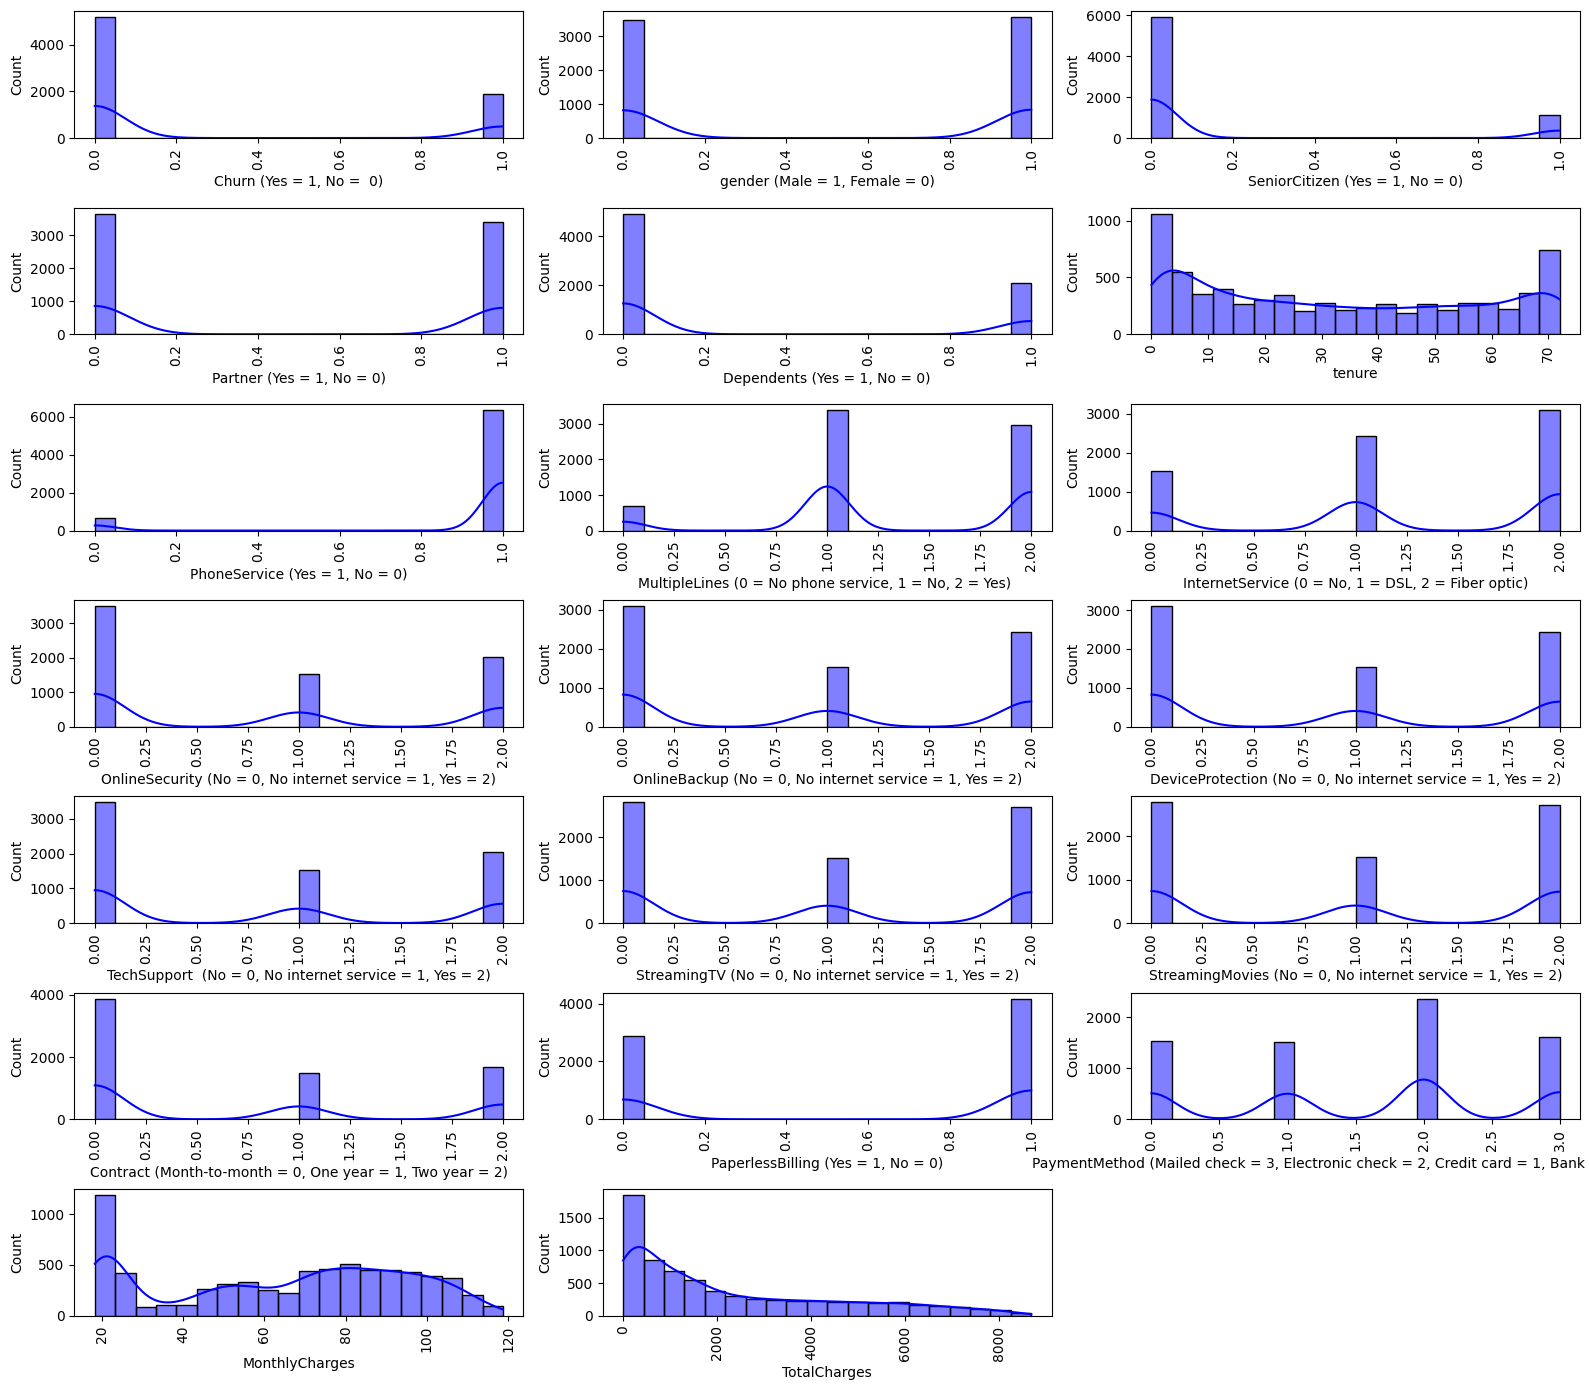

In [10]:
#figuresize = (16, 14)
cols = 3
rows = math.ceil(len(numerical_columns) / cols)

plt.figure(figsize=(16, 14)) # Kích thước hình vẽ
for i, column in enumerate(numerical_columns):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[numerical_columns[i-1]], color='blue', edgecolor='black', kde=True, bins=20)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

C:\Users\baokh\AppData\Local\Temp\ipykernel_11440\1900237466.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(x="Score", y="Specs", data=featureScores, palette="winter")


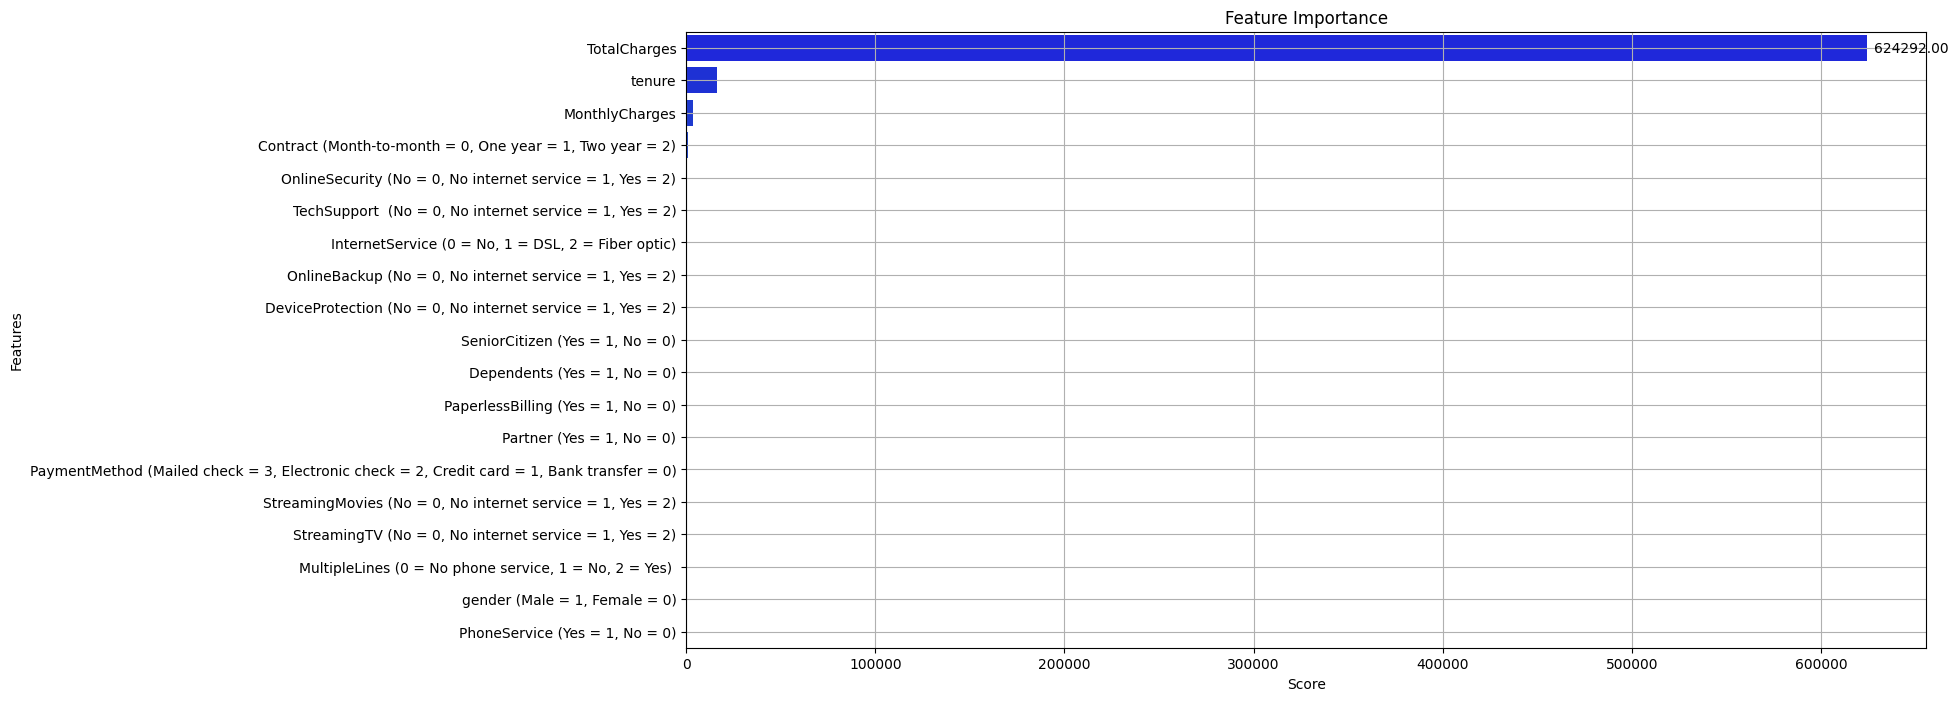

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

data = df.copy()
x = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k="all")
fit = bestfeatures.fit(x, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(fit.feature_names_in_)

# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ["Specs", "Score"]

# Plot the scores, sorted by the score
plt.figure(figsize=(16, 8))
featureScores.sort_values(by="Score", ascending=False, inplace=True)
fig = sns.barplot(x="Score", y="Specs", data=featureScores, palette="winter")
plt.title("Feature Importance")
plt.xlabel("Score")
plt.ylabel("Features")
plt.grid()

fig.bar_label(fig.containers[0], labels=dfscores.values.reshape(-1).sort(), fmt="%.2f", padding=5)
plt.show()

In [12]:
x = df.drop(["Churn (Yes = 1, No =  0)", "customerID"], axis=1)
y = df["Churn (Yes = 1, No =  0)"]

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

In [14]:
print("Size training data:", x_train.shape)
print("Size testing data:", x_test.shape)


Size training data: (4225, 19)
Size testing data: (2818, 19)


In [15]:
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(x_train,y_train)
y_pred_logis=logis.predict(x_test)
from sklearn.metrics import accuracy_score
accuraccuracy_logis=accuracy_score(y_test,y_pred_logis)
print("Accuracy: {:.2f}".format(accuraccuracy_logis))

Accuracy: 0.80


C:\Users\baokh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_logis)
cnf_matrix

array([[1826,  231],
       [ 346,  415]], dtype=int64)

Text(0.5, 23.52222222222222, 'Dự báo')

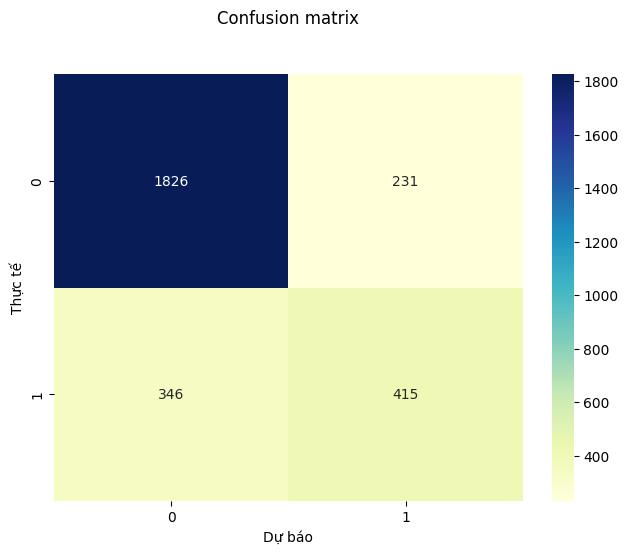

In [17]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logis))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      2057
           1       0.64      0.55      0.59       761

    accuracy                           0.80      2818
   macro avg       0.74      0.72      0.73      2818
weighted avg       0.79      0.80      0.79      2818



In [19]:
x_train1, x_test1, y_train1, y_test1 =train_test_split(x,y,train_size=0.7, random_state = 42)

In [20]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C= 10, gamma=1)
model.fit(x_train1, y_train1)
y_pred1 = model.predict(x_test1)

In [21]:
print("Accuracy: {:.2f}".format(model.score(x_test1,y_test1)))

Accuracy: 0.79


In [22]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test1, y_pred1)
cnf_matrix

array([[1410,  129],
       [ 322,  252]], dtype=int64)

Text(0.5, 23.52222222222222, 'Dự báo')

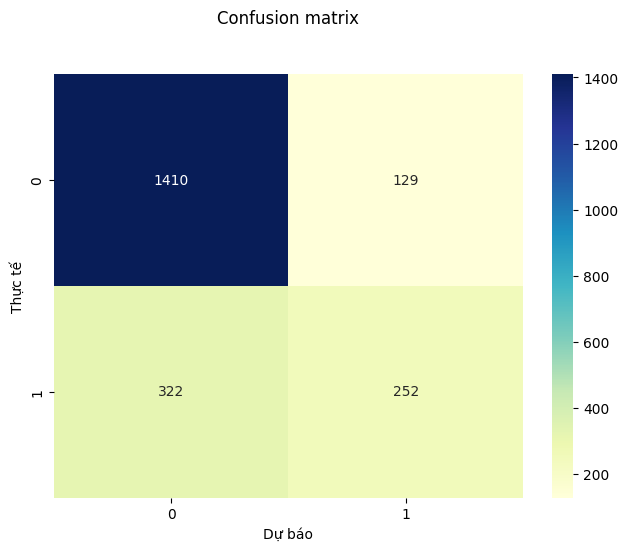

In [23]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Thực tế')
plt.xlabel('Dự báo')

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1539
           1       0.66      0.44      0.53       574

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.69      2113
weighted avg       0.77      0.79      0.77      2113

